In [1]:
import numpy as np
# from scipy import misc # load image
import imageio
np.random.seed(1)

#structure filename
path ='YALE/YALE/unpadded/'
ids = range(1,16)
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
#data dimension
h = 116 # height
w = 98  #weight
D = w*h #( vì color gray nên chanels sẽ là 1, không như các bức ảnh màu khác là 3: D =w*h*3)
N = len(states)*15 #165
K = 100 #( K<N, số chiều D  ban đầu 11368 => giảm còn 100)

#collect all data
X = np.zeros((D,N))
cnt = 0
for person_id in range(1,16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        print(fn)
        X[:,cnt] = imageio.imread(fn).reshape(D)
        cnt +=1
# Doing PCA, note each row of each point data
from sklearn.decomposition import PCA
pca = PCA(n_components =K) #K =100
pca.fit(X.T)

# project matrix 
U = pca.components_.T #( convert columns)
print(U.shape)

YALE/YALE/unpadded/subject01.centerlight.pgm
YALE/YALE/unpadded/subject01.glasses.pgm
YALE/YALE/unpadded/subject01.happy.pgm
YALE/YALE/unpadded/subject01.leftlight.pgm
YALE/YALE/unpadded/subject01.noglasses.pgm
YALE/YALE/unpadded/subject01.normal.pgm
YALE/YALE/unpadded/subject01.rightlight.pgm
YALE/YALE/unpadded/subject01.sad.pgm
YALE/YALE/unpadded/subject01.sleepy.pgm
YALE/YALE/unpadded/subject01.surprised.pgm
YALE/YALE/unpadded/subject01.wink.pgm
YALE/YALE/unpadded/subject02.centerlight.pgm
YALE/YALE/unpadded/subject02.glasses.pgm
YALE/YALE/unpadded/subject02.happy.pgm
YALE/YALE/unpadded/subject02.leftlight.pgm
YALE/YALE/unpadded/subject02.noglasses.pgm
YALE/YALE/unpadded/subject02.normal.pgm
YALE/YALE/unpadded/subject02.rightlight.pgm
YALE/YALE/unpadded/subject02.sad.pgm
YALE/YALE/unpadded/subject02.sleepy.pgm
YALE/YALE/unpadded/subject02.surprised.pgm
YALE/YALE/unpadded/subject02.wink.pgm
YALE/YALE/unpadded/subject03.centerlight.pgm
YALE/YALE/unpadded/subject03.glasses.pgm
YALE/YAL

In [2]:
import matplotlib.pyplot as plt

for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:,i].reshape((116,98)), interpolation ='nearest')
    plt.gray()
    fn ='YALE/YALE/picture_after_PCA/eigenface'+ str(i).zfill(2) + '.png'
    plt.savefig(fn)

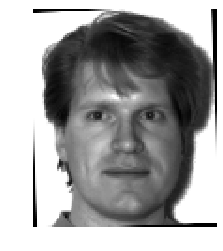

<Figure size 432x288 with 0 Axes>

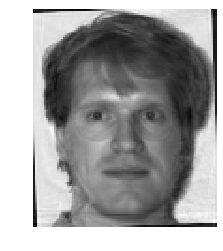

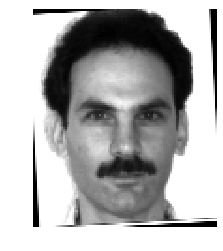

<Figure size 432x288 with 0 Axes>

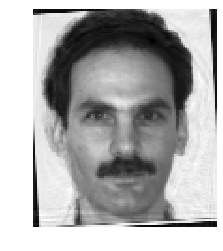

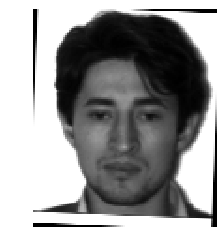

<Figure size 432x288 with 0 Axes>

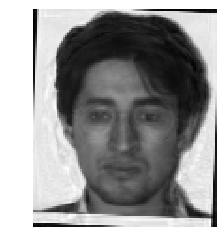

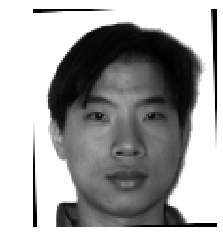

<Figure size 432x288 with 0 Axes>

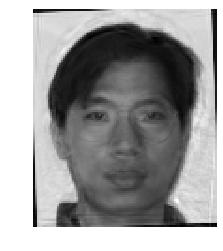

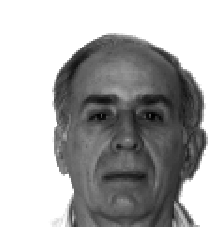

<Figure size 432x288 with 0 Axes>

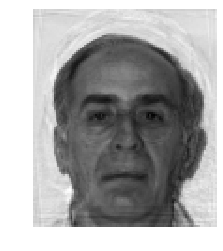

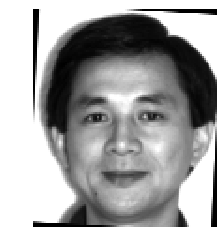

<Figure size 432x288 with 0 Axes>

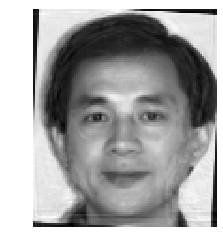

In [4]:
for person in range(1,7): # lấy 6 person ban đầu
    for state in ['centerlight']: # chỉ lấy trạng thái centerlight
        # HIỂN THỊ 6 NGƯỜI BAN ĐẦU (CENTERLIGHT) CÓ D= 11368 CHIỀU
        fn = path + prefix + str(person).zfill(2)+ '.'+ state + surfix
        im = imageio.imread(fn)
        plt.axis('off')
        #  plt.imshow(im, interpolation='nearest' )
        f1 = plt.imshow(im, interpolation ='nearest')
        plt.show()
        fn = 'YALE/YALE/picture_after_PCA/ori' + str(person).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches ='tight', pad_inches =0)
        plt.show()
        
        
        # HIỂN THỊ 6 NGƯỜI BAN ĐẦU (CENTERLIGHT) CÓ K =100 CHIỀU 
        # reshape and subtract mean , dont forget
        x_hat = im.reshape(D,1) - pca.mean_.reshape(D,1)  # trừ mổi điểm dữ liệu cho kì vọng của nó : X_hat = X- X.mean
        # encode : biểu diễn các điểm dữ liệu trong không gian có số chiều nhỏ hơn Z = U.T.dot(X_hat)
        Z = U.T.dot(x_hat)
        # decode ( biểu diễn các điểm dữ liệu ban đầu : x_bđ = U.dot(Z)+ x_mean)
        x_tilde = U.dot(Z) + pca.mean_.reshape(D,1)
        #reshape to oringal dim
        im_tilde = x_tilde.reshape(116,98) # biểu diễn hình vẽ phải thay đổi chiều từ D= (11368,1)=> D=(116,98)
        plt.axis('off')
        #  plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation ='nearest')
        plt.gray()
        
        fn = 'YALE/YALE/picture_after_PCA/res' + str(person).zfill(2)+ '.png'
        plt.savefig(fn, bbox_inches = 'tight', pad_inches =0)
        plt.show()

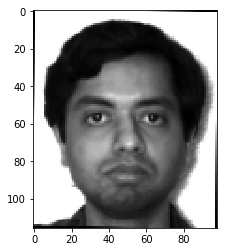

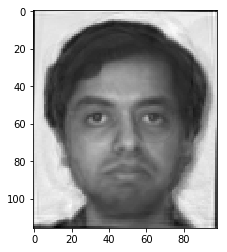

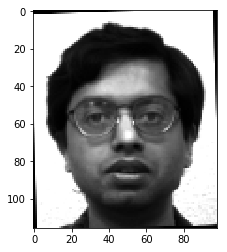

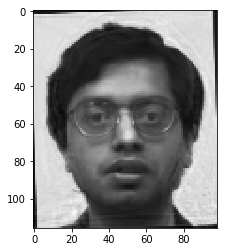

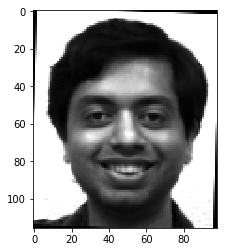

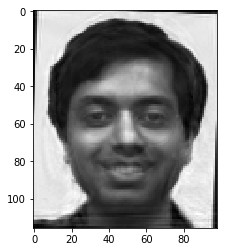

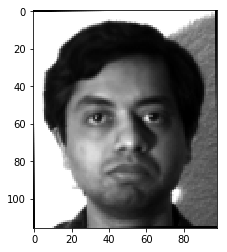

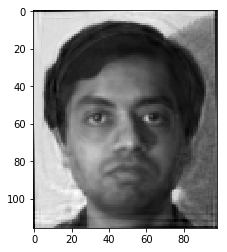

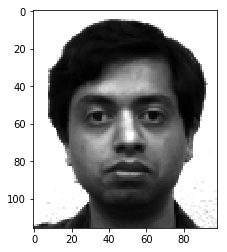

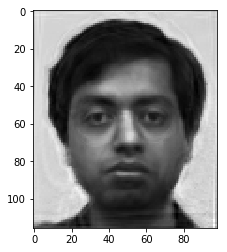

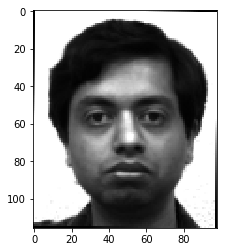

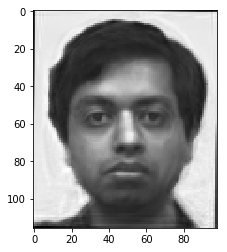

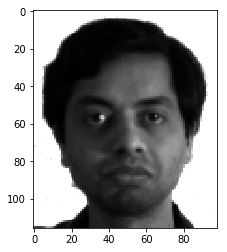

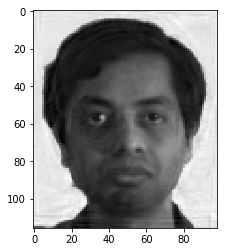

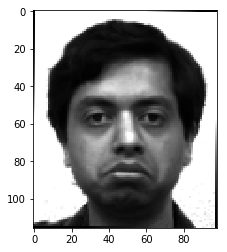

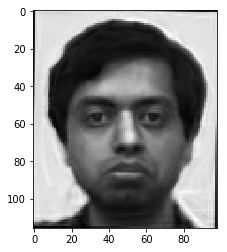

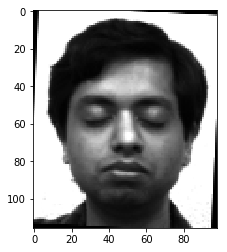

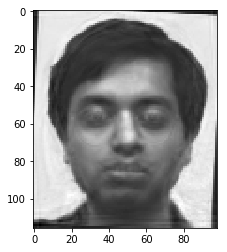

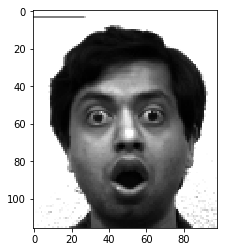

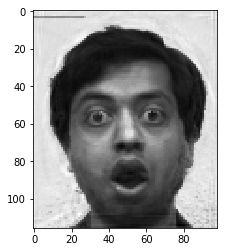

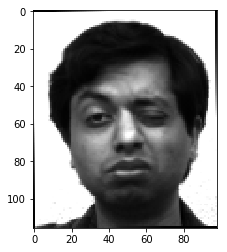

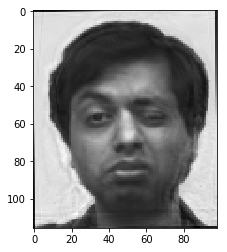

In [11]:
cnt = 0
for person_id in [10]:
    for ii, state in enumerate(states):
        #Picture normal
        fn = path + prefix + str(person_id).zfill(2) + '.'+ state + surfix
        im = imageio.imread(fn)
        plt.imshow(im)
        plt.show()
        # Picture dimension reduce
        x_hat = im.reshape(D,1) - pca.mean_.reshape(D,1)
        # decode : biểu diễn các điểm dl trong không gian có số chiều nhỏ hơn
        Z = U.T.dot(x_hat)
        # encode ( biểu diễn các điểm dữ liệu ban đầu)
        x_first = U.dot(Z) + pca.mean_.reshape(D,1)
        # thay đổi chiều bức ảnh (116,98)
        im = x_first.reshape(116,98)
        plt.imshow(im)
        plt.show()